1. Introduction
   
In this notebook, we will build a fuzzy gift selection system that helps choose the best gift based on:

Personality

Occasion

Budget

Level of Closeness


We are going to define fuzzy rules to compute the gift recommendation based on these factors, and we will use fuzzy c-means clustering to handle prediction tasks.

2. Defining Inputs (Antecedents) and Outputs (Consequents)
   
The first step is to define the fuzzy variables (called "Antecedents" for inputs and "Consequents" for outputs). In this system, we will consider four inputs (personality, occasion, budget, and closeness) and one output (gift type). For each input, we will define membership functions that represent the degree of truth for fuzzy terms like "fun," "birthday," or "low budget."

3. Defining Membership Functions
Next is to define the membership functions for each input variable. These functions describe how each crisp input value (e.g., a personality score of 7) maps to fuzzy terms (e.g., fun, casual, formal). For the output variable (gift), we will define the membership functions for different gift types like sentimental, gadget, and luxury.

In [23]:
%matplotlib inline

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define ranges for personality, occasion, budget, and closeness

# Personality can range from 0 (introvert) to 10 (extrovert/fun-loving)
personality = ctrl.Antecedent(np.arange(0, 11, 1), 'personality')

# Values for specific occasions
occasion = ctrl.Antecedent(np.arange(0, 4, 1), 'occasion')  # 0 = Birthday, 1 = Anniversary, 2 = Holiday, 3 = Other

# Budget can range from $0 to $500
budget = ctrl.Antecedent(np.arange(0, 501, 50), 'budget')

# Closeness is on a scale from 0 (acquaintance) to 10 (close family)
closeness = ctrl.Antecedent(np.arange(0, 11, 1), 'closeness')

# Define gift types as the output, from 0 (sentimental) to 10 (luxury)
gift = ctrl.Consequent(np.arange(0, 11, 1), 'gift')

# Define fuzzy membership functions for personality (introvert to extrovert)
personality['introvert'] = fuzz.trimf(personality.universe, [0, 0, 5])
personality['neutral'] = fuzz.trimf(personality.universe, [2, 5, 8])
personality['extrovert'] = fuzz.trimf(personality.universe, [5, 10, 10])

# Define fuzzy membership functions for occasion (discrete categories)
occasion['birthday'] = fuzz.trimf(occasion.universe, [0, 0, 1])
occasion['anniversary'] = fuzz.trimf(occasion.universe, [1, 1, 2])
occasion['holiday'] = fuzz.trimf(occasion.universe, [2, 2, 3])
occasion['other'] = fuzz.trimf(occasion.universe, [3, 3, 4])

# Define fuzzy membership functions for budget
budget['low'] = fuzz.trimf(budget.universe, [0, 0, 100])
budget['medium'] = fuzz.trimf(budget.universe, [100, 250, 400])
budget['high'] = fuzz.trimf(budget.universe, [300, 500, 500])

# Define fuzzy membership functions for closeness
closeness['acquaintance'] = fuzz.trimf(closeness.universe, [0, 0, 5])
closeness['friend'] = fuzz.trimf(closeness.universe, [3, 5, 8])
closeness['family'] = fuzz.trimf(closeness.universe, [6, 10, 10])

# Define fuzzy membership functions for gift type (sentimental, gadget, luxury)
gift['sentimental'] = fuzz.trimf(gift.universe, [0, 0, 5])
gift['gadget'] = fuzz.trimf(gift.universe, [3, 5, 7])
gift['luxury'] = fuzz.trimf(gift.universe, [6, 10, 10])


4. Visualizing Membership Functions
   
We can visualize how each of the membership functions looks. This helps us understand how the system interprets the input values and assigns fuzzy membership degrees to different categories.

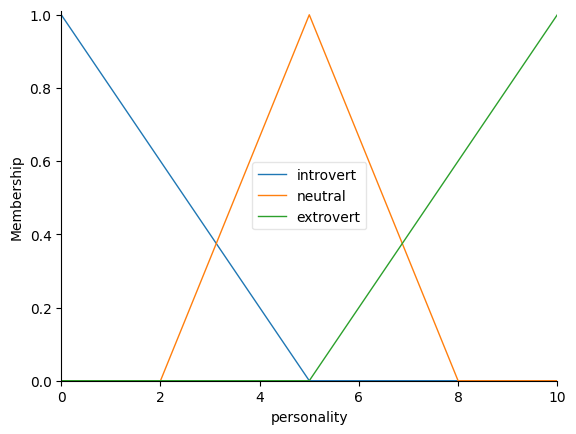

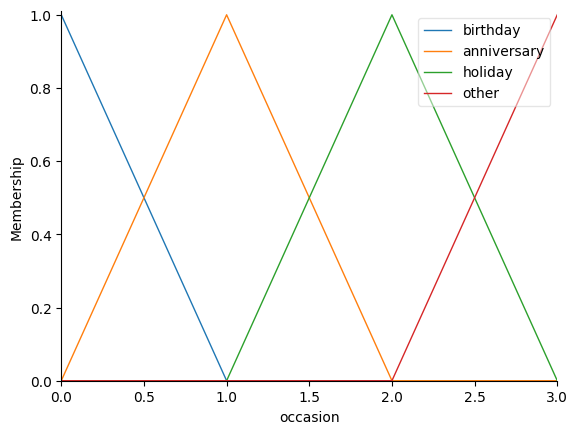

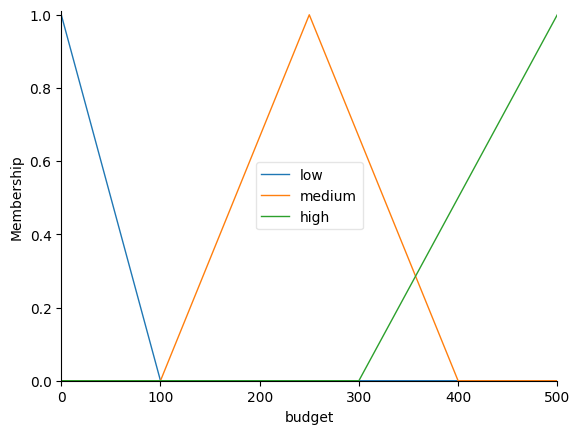

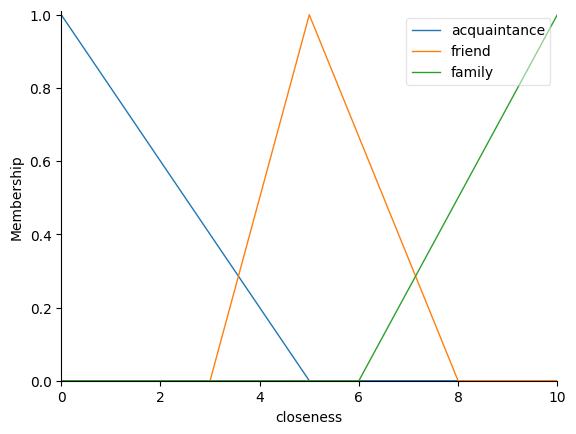

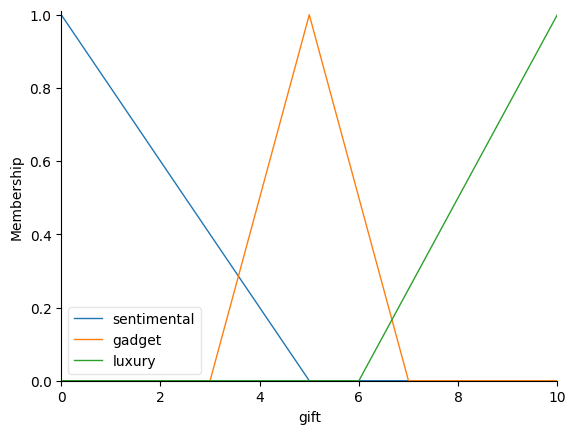

In [25]:
personality.view()
occasion.view()
budget.view()
closeness.view()
gift.view()

5. Defining Fuzzy Rules
   
Here, we define the fuzzy rules that control how the input variables (personality, occasion, budget, and closeness) combine to determine the output (gift type). For example, "If the personality is fun and the occasion is a birthday, then the gift should be a gadget."

(<Figure size 640x480 with 1 Axes>, <Axes: >)

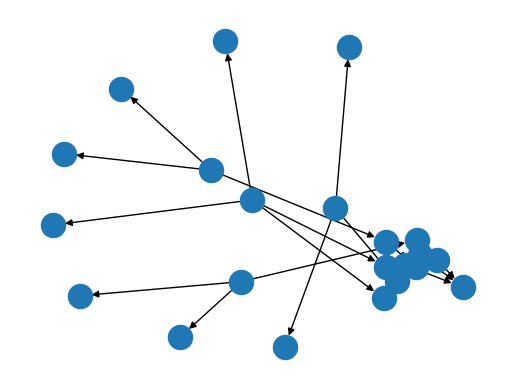

In [26]:
rule1 = ctrl.Rule(personality['extrovert'] & occasion['birthday'] & budget['high'] & closeness['family'], gift['luxury'])
rule2 = ctrl.Rule(personality['neutral'] & occasion['anniversary'] & budget['medium'] & closeness['friend'], gift['gadget'])
rule3 = ctrl.Rule(personality['introvert'] & occasion['holiday'] & budget['low'] & closeness['acquaintance'], gift['sentimental'])
rule4 = ctrl.Rule(personality['extrovert'] & occasion['other'] & budget['medium'] & closeness['friend'], gift['gadget'])
rule5 = ctrl.Rule(personality['neutral'] & occasion['birthday'] & budget['high'] & closeness['family'], gift['luxury'])

# Visualize the first rule
rule1.view()

6. Creating and Simulating the Control System
   
Once the rules are defined, we create a fuzzy control system and simulate it with specific inputs, such as a fun personality, a birthday, medium budget, and closeness as a friend. The system will compute the recommended gift based on these inputs.

Suggested gift type: 8.444444444444445


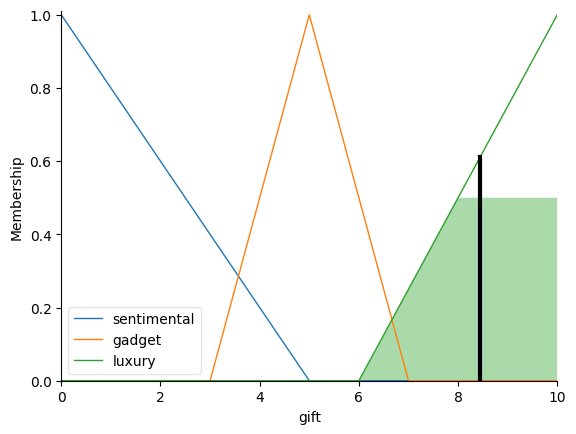

In [27]:
# Create the control system
gift_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# Create a ControlSystemSimulation
gift_simulation = ctrl.ControlSystemSimulation(gift_ctrl)

# Provide inputs
gift_simulation.input['personality'] = 9.0  # Extrovert
gift_simulation.input['occasion'] = 0  # Birthday
gift_simulation.input['budget'] = 450  # High budget
gift_simulation.input['closeness'] = 8.0  # Family

# Compute the result
gift_simulation.compute()

# Output the suggested gift
print(f"Suggested gift type: {gift_simulation.output['gift']}")

# Visualize the output
gift.view(sim=gift_simulation)


7. Fuzzy C-Means Clustering for Gift Selection
   
Next, we use fuzzy c-means clustering to predict gift types based on new data, such as personality and closeness levels. Fuzzy c-means allows us to assign membership degrees to new data points, determining how closely they belong to each gift category.

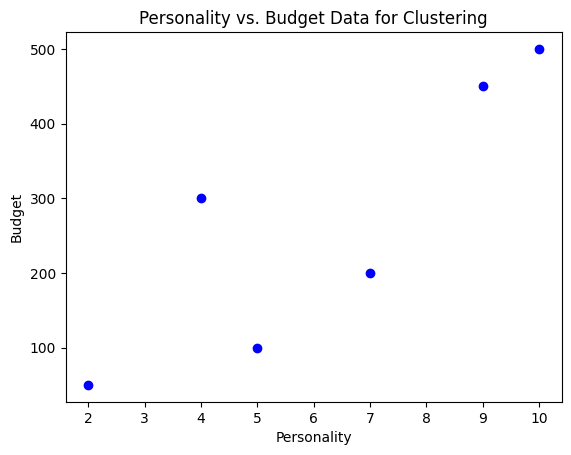

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

# Generate data points for clustering (personality and budget)
data_points = np.array([[5, 100], [9, 450], [2, 50], [4, 300], [7, 200], [10, 500]])

# Visualize the data
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue')
plt.title('Personality vs. Budget Data for Clustering')
plt.xlabel('Personality')
plt.ylabel('Budget')
plt.show()


8. Applying Fuzzy C-Means Clustering
   
We apply fuzzy c-means clustering to group gift preferences based on the data, identifying three main clusters. The cluster centers and their membership functions help us determine the appropriate gift types for new data.

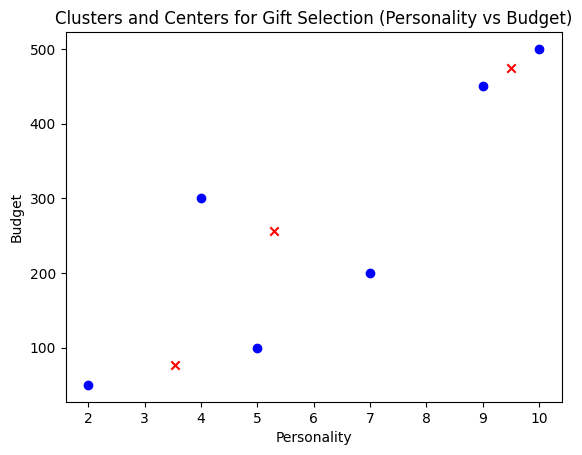

Fuzzy Partition Coefficient: 0.8899214523483879


In [29]:
# Perform fuzzy c-means clustering with 3 centers
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data_points.T, 3, 2, error=0.005, maxiter=1000)

# Visualize clusters and centers
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue')
plt.scatter(cntr[:, 0], cntr[:, 1], color='red', marker='x')
plt.title('Clusters and Centers for Gift Selection (Personality vs Budget)')
plt.xlabel('Personality')
plt.ylabel('Budget')
plt.show()

print(f"Fuzzy Partition Coefficient: {fpc}")


9. Predicting New Data with Fuzzy C-Means
    
Finally, we predict gift preferences for new data points using the cluster centers learned from fuzzy c-means. The system assigns membership degrees to each point and classifies them into one of the gift categories.

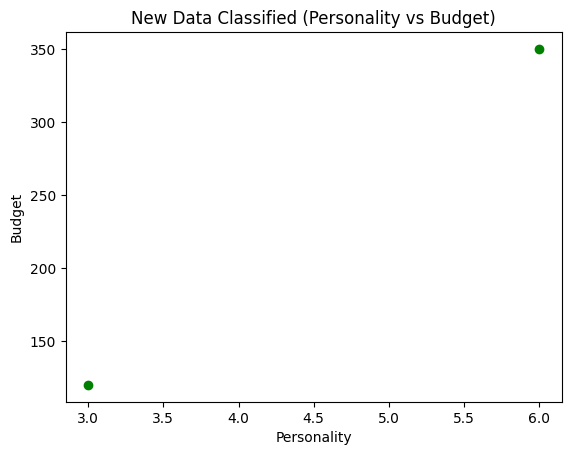

In [30]:
# New data to classify based on personality and budget
new_data = np.array([[6, 350], [3, 120]])

# Predict cluster membership
u, u0, _, _, _, _ = fuzz.cluster.cmeans_predict(new_data.T, cntr, 2, error=0.005, maxiter=1000)

# Visualize the classified data points
cluster_membership = np.argmax(u, axis=0)
plt.scatter(new_data[:, 0], new_data[:, 1], color='green')
plt.title('New Data Classified (Personality vs Budget)')
plt.xlabel('Personality')
plt.ylabel('Budget')
plt.show()
